In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from matplotlib import rc
rc('font', **{'family': 'Libertine'})
rc('text', usetex=True)
rc('font', size=16)# Set the default text font size
rc('axes', titlesize=20)# Set the axes title font size
rc('axes', labelsize=16)# Set the axes labels font size
rc('xtick', labelsize=16)# Set the font size for x tick labels
rc('ytick', labelsize=16)# Set the font size for y tick labels
rc('legend', fontsize=16)# Set the legend font size

In [3]:
def draw_mean(df_amise, save_file=None):
    fig = plt.figure(figsize=(5, 4))
    #for i, method in enumerate(df_beta["method"].unique()):
    #    plt.scatter(df_beta["size"].unique(), df_beta[df_beta["method"]==method]["pf_ic_low"], marker="_", color=f"C7")
    #    plt.scatter(df_beta["size"].unique(), df_beta[df_beta["method"]==method]["pf_ic_up"], marker="_", color=f"C7")
    #    plt.fill_between(df_beta["nb_samples"].unique(), df_beta[df_beta["method"]==method]["pf_ic_low"], df_beta[df_beta["method"]==method]["pf_ic_up"] , color=f"C3", alpha=0.2)
    #    plt.plot(df_beta["nb_samples"].unique(), df_beta[df_beta["method"]==method]["pf_mean"], label=method + " (Beta tuning)", marker="d", color=f"C3")

    for i, method in enumerate(df_amise["method"].unique()):
        if method=="BANCS":
            label = "BANCS (AMISE tuning)"
        else : 
            label = method
        plt.fill_between(df_amise[df_amise["method"]==method]["nb_samples"], df_amise[df_amise["method"]==method]["pf_ic_low"], df_amise[df_amise["method"]==method]["pf_ic_up"], color=f"C{i}", alpha=0.2)
        plt.plot(df_amise[df_amise["method"]==method]["nb_samples"], df_amise[df_amise["method"]==method]["pf_mean"], label=label, marker="d", color=f"C{i}")
    #plt.axhline(df_amise["pf_ref"].unique(), color="k", zorder=0, label="Reference $p_\mathrm{f}$")
    plt.axhline(df_amise["pf_ref"].unique(), color="k", zorder=0)

    plt.legend(ncols=2, bbox_to_anchor=(1.05, -0.15))
    #plt.title("Adaptive reliability benchmark (100 reps)")
    plt.xlabel("Subset size ($N$)")
    plt.ylabel("Mean($\hat{p_\mathrm{f}}$)")
    plt.grid()
    plt.xscale('log')
    #plt.yscale('log')
    if save_file is not None:
        plt.savefig(save_file, dpi=300, bbox_inches='tight')
    return fig

def draw_stat(df_amise, stat="pf_std", save_file=None):
    fig = plt.figure(figsize=(5, 4))
    #for i, method in enumerate(df_beta["method"].unique()):
    #    plt.plot(df_beta["nb_samples"].unique(), df_beta[df_beta["method"]==method][stat], label=method + " (Beta tuning)", marker="d", color=f"C3")

    for i, method in enumerate(df_amise["method"].unique()):
        if method=="BANCS": 
            label = "BANCS (AMISE tuning)"
        else : 
            label = method
        plt.plot(df_amise[df_amise["method"]==method]["nb_samples"], df_amise[df_amise["method"]==method][stat], label=label, marker="d", color=f"C{i}")
    plt.legend(ncols=2, bbox_to_anchor=(1.05, -0.15))
    #plt.title("Adaptive reliability benchmark (100 reps)")
    plt.xlabel("Subset size ($N$)")
    if stat == "pf_std":
        plt.ylabel("Standard deviation($\hat{p_\mathrm{f}}$)")
    elif stat == "pf_med":
        plt.ylabel("Median($\hat{p_\mathrm{f}}$)")
    plt.grid()
    plt.xscale('log')
    plt.yscale('log')
    if save_file is not None:
        plt.savefig(save_file, dpi=300, bbox_inches='tight')
    return fig

def draw_cov(df_amise, save_file=None):
    fig = plt.figure(figsize=(5, 4))
    #for i, method in enumerate(df_beta["method"].unique()):
    #    plt.plot(df_beta["nb_samples"].unique(), df_beta[df_beta["method"]==method]["pf_std"] / df_beta[df_beta["method"]==method]["pf_ref"], label=method + " (Beta tuning)", marker="d", color=f"C3")

    for i, method in enumerate(df_amise["method"].unique()):
        if method=="BANCS": 
            label = "BANCS (AMISE tuning)"
        else : 
            label = method
        plt.plot(df_amise[df_amise["method"]==method]["nb_samples"], df_amise[df_amise["method"]==method]["pf_std"] / df_amise[df_amise["method"]==method]["pf_ref"], label=label, marker="d", color=f"C{i}")
    plt.legend(ncols=2, bbox_to_anchor=(1.05, -0.15))
    #plt.title("Adaptive reliability benchmark (100 reps)")
    plt.xlabel("Subset size ($N$)")
    plt.ylabel("Coefficient of variation($\hat{p_\mathrm{f}}$)")
    plt.grid()
    plt.xscale('log')
    plt.yscale('log')
    if save_file is not None:
        plt.savefig(save_file, dpi=300, bbox_inches='tight')
    return fig

## Parabolic problem

In [4]:
1 + int(np.floor(1e4 ** (2 / (4 + 2)))) / 2

11.5

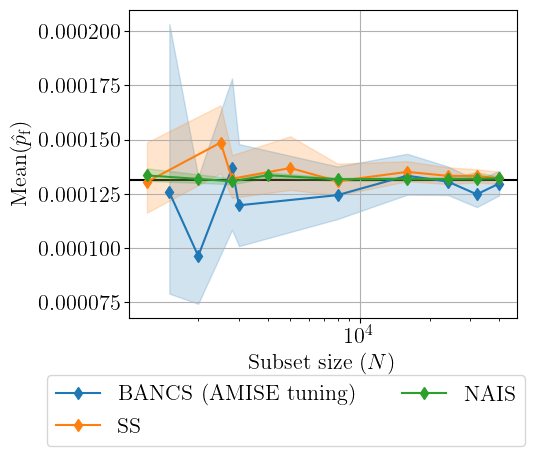

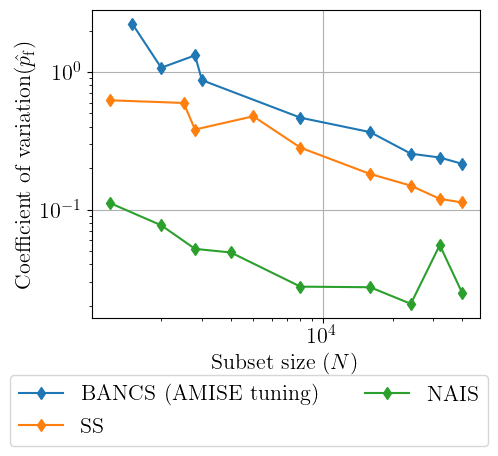

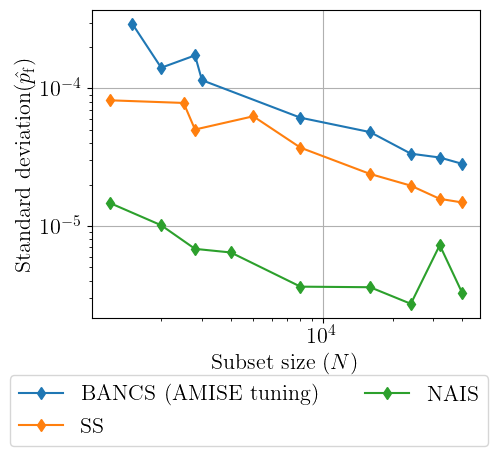

In [5]:
df_amise = pd.read_csv("results/Parabolic_results_amise.csv")
draw_mean(df_amise, save_file="figures/Parabolic_mean.pdf");
draw_cov(df_amise, save_file="figures/Parabolic_cov.pdf");
draw_stat(df_amise, save_file="figures/Parabolic_std.pdf");
#draw_stat(df_amise, stat="pf_med", save_file="figures/Parabolic_median.pdf");

In [6]:
df_amise

,problem,method,size,nb_samples,pf_mean,pf_ref,pf_std,pf_ic_low,pf_ic_up,pfs
0,Parabolic,BANCS,300,1500,0.000126,0.000132,0.000295,0.000079,0.000204,"[1.1717618790661216e-05, 7.145453908199845e-05..."
1,Parabolic,BANCS,500,2000,0.000096,0.000132,0.000141,0.000074,0.000133,"[3.0322490653603286e-05, 0.0007593622321768842..."
2,Parabolic,BANCS,700,2800,0.000137,0.000132,0.000174,0.000108,0.000178,"[4.906675156254835e-05, 0.0005313967219051013,..."
3,Parabolic,BANCS,1000,3000,0.000120,0.000132,0.000115,0.000101,0.000148,"[0.00028396143108883396, 7.917920508904452e-05..."
4,Parabolic,BANCS,2000,8000,0.000124,0.000132,0.000061,0.000113,0.000138,"[0.00020071248028828112, 0.000223338181229254,..."
5,Parabolic,BANCS,4000,16000,0.000133,0.000132,0.000048,0.000125,0.000143,"[9.64027216345672e-05, 0.00022112174785000722,..."
6,Parabolic,BANCS,6000,24000,0.000131,0.000132,0.000034,0.000124,0.000138,"[0.00017334935626330184, 0.0001338516426198411..."
7,Parabolic,BANCS,8000,32000,0.000125,0.000132,0.000031,0.000119,0.000131,"[9.112458501637634e-05, 0.0001529569864731648,..."
8,Parabolic,BANCS,10000,40000,0.000130,0.000132,0.000028,0.000124,0.000136,"[0.0002002130939134545, 0.00014344314891030142..."
9,Parabolic,SS,300,1200,0.000130,0.000132,0.000082,0.000116,0.000149,"[0.00012000000000000013, 9.433333333333337e-05..."


## Four Branch problem

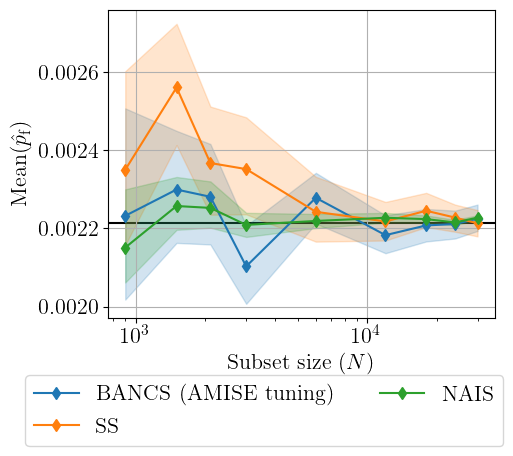

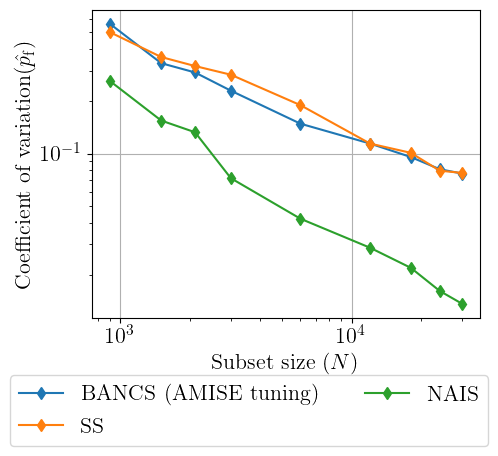

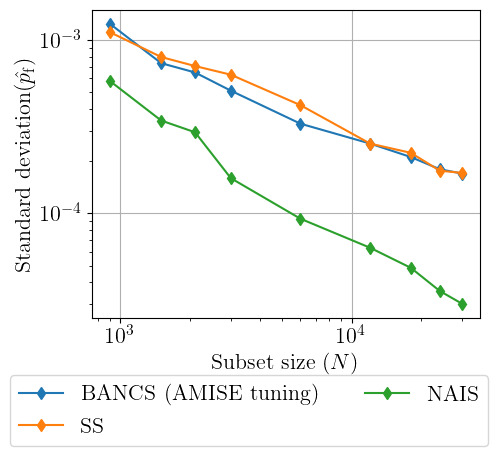

In [7]:
df_amise = pd.read_csv("results/RP4B_results_amise.csv")
draw_mean(df_amise, save_file="figures/RP4B_mean.pdf");
draw_cov(df_amise, save_file="figures/RP4B_cov.pdf");
draw_stat(df_amise, save_file="figures/RP4B_std.pdf");
#draw_stat(df_beta, df_amise, stat="pf_med", save_file="figures/RP4B_median.pdf");

## Reliability problem 53

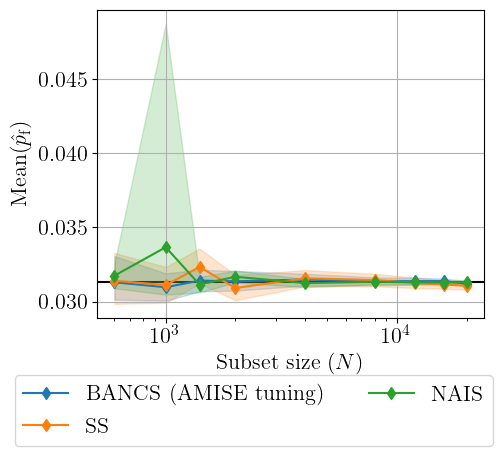

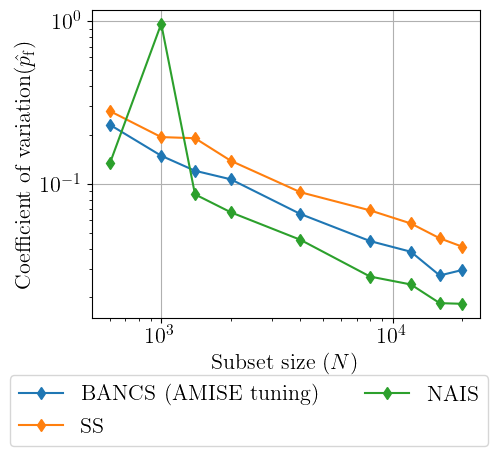

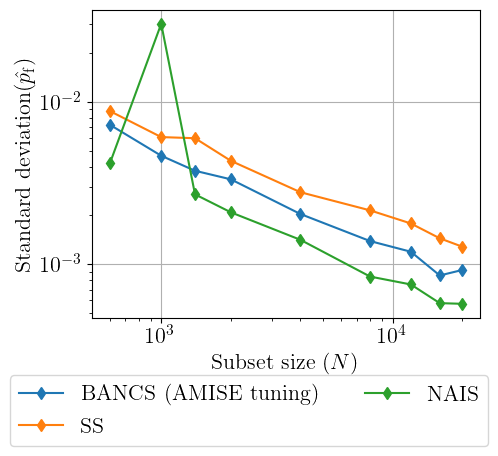

In [8]:
df_amise = pd.read_csv("results/RP53_results_amise.csv")
draw_mean(df_amise, save_file="figures/RP53_mean.pdf");
draw_cov(df_amise, save_file="figures/RP53_cov.pdf");
draw_stat(df_amise, save_file="figures/RP53_std.pdf");
#draw_stat(df_amise, stat="pf_med", save_file="figures/RP57_median.pdf");

## Reliability problem 38

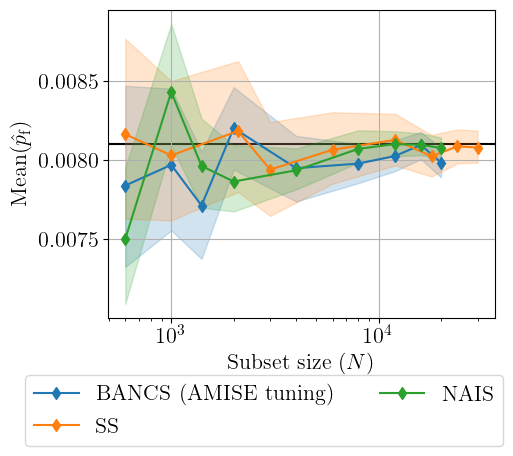

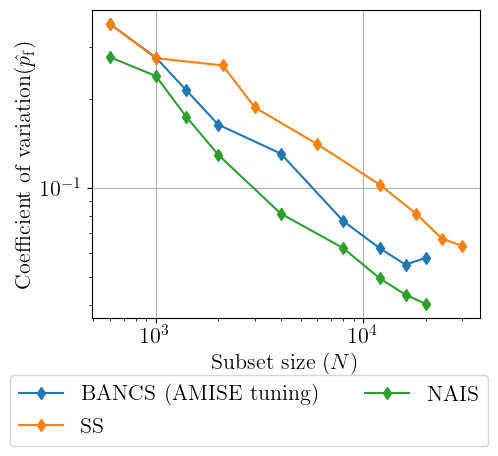

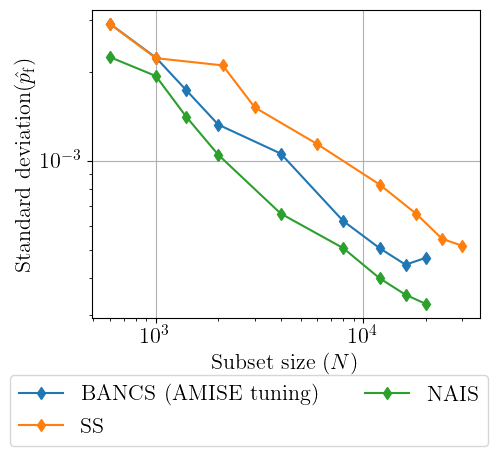

In [9]:
df_amise = pd.read_csv("results/RP38_results_amise.csv")

draw_mean(df_amise, save_file="figures/RP38_mean.pdf");
draw_cov(df_amise, save_file="figures/RP38_cov.pdf");
draw_stat(df_amise, save_file="figures/RP38_std.pdf");
#draw_stat(df_amise, stat="pf_med", save_file="figures/RP38_median.pdf");